In [32]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt   
from pandas.plotting import register_matplotlib_converters
from utilities.base import BaseData
from utilities.utils import geo_mean
register_matplotlib_converters()

In [22]:
df = BaseData().get_filled_df()
df.head(1)

/Users/user/Desktop/RANEPA_lec_24_03/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,category_id,category_title,date,miss,price_old,site_code,site_link,site_title,site_unit,type,price_new,nsprice_f
id,,,,,,,,,,,,
0,10,"Молоко питьевое цельное пастеризованное 2,5-3,...",2019-02-05,0,-1.0,globus,https://online.globus.ru/products/moloko-36-ko...,"Молоко пастеризованное 36 Копеек 3,2%, 485 мл",за 1 шт.,food,34.89,34.89


In [23]:
df = df[df.category_id!=76]
# df = df[df.site_code!='ozon']
df.loc[:,'unq'] = df.category_id.astype(str) + df.site_link
df.loc[:,'date'] = pd.to_datetime(df.date)
df = df[df.miss==0]
df = df.drop(columns=['category_id','site_title','site_unit',
                      'site_link','price_new','miss','price_old','site_code'])
srs = df.groupby('unq')['nsprice_f'].transform(lambda x: x.pct_change()+1)
df.loc[:,'cng_price'] = srs
# df = df.drop(columns=['nsprice_f'])

pvt_df = df.pivot_table(index='date', columns='category_title', aggfunc=geo_mean).loc[:,'cng_price'].iloc[1:]
pvt_df = pvt_df.loc['2020-09-02':,:]
pvt_df.iloc[0,:] = 1

pvt_df = pvt_df.fillna(method='ffill').apply(lambda x: x.cumprod(), axis=0).dropna(how='all')

In [24]:
pvt_df.loc['2020-09-02',:]

category_title
Абонентская плата за неограниченный объем местных телефонных соединений    1.0
Ацетилсалициловая кислота (Аспирин отечественный)                          1.0
Баранина (кроме бескостного мяса)                                          1.0
Блузка женская                                                             1.0
Ботинки, полуботинки для детей школьного возраста                          1.0
                                                                          ... 
Чай черный байховый                                                        1.0
Шампунь                                                                    1.0
Электропылесосы                                                            1.0
Яблоки                                                                     1.0
Яйца куриные                                                               1.0
Name: 2020-09-02 00:00:00, Length: 76, dtype: float64

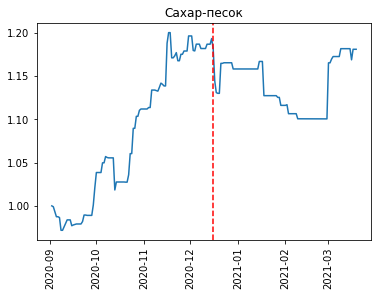

In [43]:
# Сахар-песок
date_range = (pvt_df.index > '2020-09-01')&(pvt_df.index < '2021-03-20')
plt.plot(pvt_df.loc[date_range, 'Сахар-песок']);
plt.axvline(x='2020-12-16', color='red', ls='--');
plt.title('Сахар-песок');
plt.xticks(rotation=90);

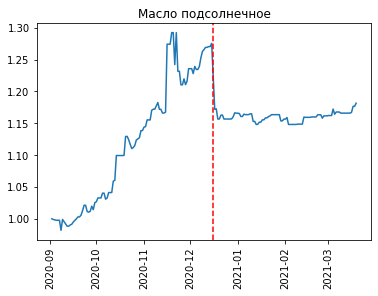

In [42]:
# Масло подсолнечное

plt.plot(pvt_df.loc[date_range, 'Масло подсолнечное']);
plt.axvline(x='2020-12-16', color='red', ls='--');
plt.title('Масло подсолнечное');
plt.xticks(rotation=90);

In [66]:
# export to excel
df_toexcel = pvt_df.loc[date_range, ['Сахар-песок','Масло подсолнечное']]
df_toexcel = (df_toexcel.pct_change()+1)
df_toexcel.iloc[0,:] = 1
df_toexcel = df_toexcel.cumprod()
df_toexcel.to_excel('dec2020_df.xlsx')